# Author : Dnyanada Jalindre
## Task : Prediction using Decision Tree Algorithm

![iris species](iris.jfif)

**Decision tree is a type of supervised learning algorithm that can be used in both regression and classification problems.**

**For this task we are using Decision Tree Classification**

Given dataset : **Iris flower dataset**

## 1. Importing Libraries and dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Importing iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

Iris data without our target variable(i.e Species) We need to add our target vaiable.

In [3]:
# Let's check how our data looks..!
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Here we get our dataframe without target variable. I'm creating a new "Species" column with target values.

Target values are numerical : 0, 1, 2 So we need to convert them into corresponding values like 'setosa', 'versicolor' & 'virginica'

In [4]:
# Now adding our target variable.
iris_data["Species"] = iris["target"]

# Applying lambda function to convert target values.
iris_data["Species"] = iris_data["Species"].apply(lambda x: iris["target_names"][x])

In [5]:
# Data loaded successfully...!
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Exploratory Data Analysis

In [6]:
# Data summary
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# checking data types and any missing values.
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


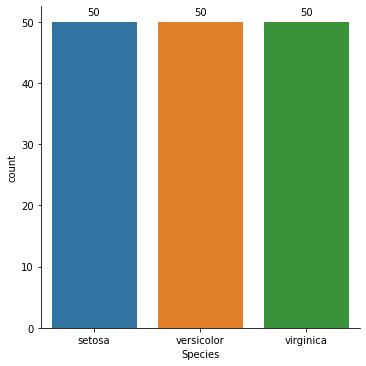

In [8]:
# we are using catplot to differentiate types of iris species.
plots = sns.catplot(x="Species", kind="count", data = iris_data)
for ax in plots.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

There are total 150 records : Setosa = 50,  Versicolor = 50,  Virginica = 50

                             

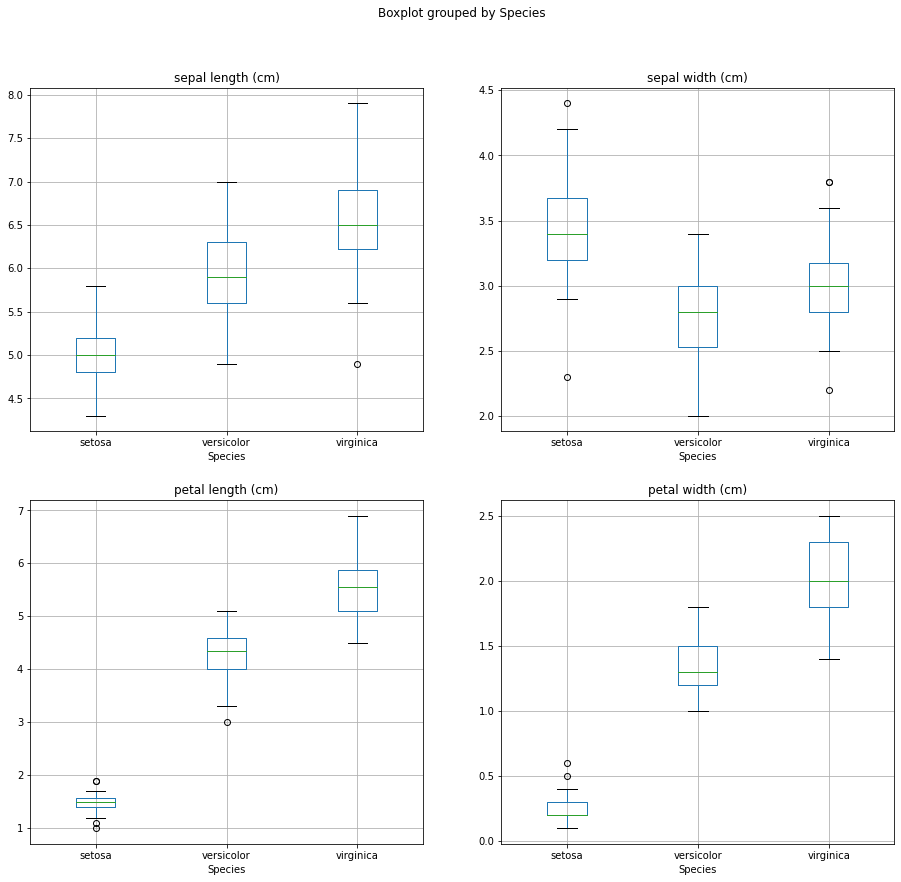

In [9]:
fig, axes = plt.subplots(2,2) 
fig.set_figheight(14)
fig.set_figwidth(15)

for i,col in enumerate(list(iris_data.columns.values)[:-1]):
    a = iris_data.boxplot(col, by="Species", ax=axes.flatten()[i])

plt.show()

C:\Users\Dnyanada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dnyanada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


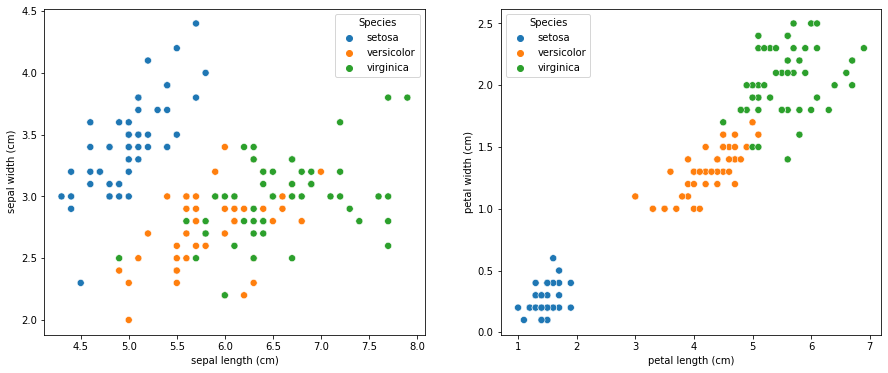

In [10]:
fig, axes = plt.subplots(1,2) 
fig.set_figheight(6)
fig.set_figwidth(15)

# for sepal length vs sepal width
sns.scatterplot(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], hue = iris_data['Species'], s= 50, ax=axes[0]);

# for petal length vs petal width
sns.scatterplot(iris_data['petal length (cm)'], iris_data['petal width (cm)'], hue = iris_data['Species'], s= 50, ax=axes[1]);

* From the above scatterplots we can see that :
1. **Setosa :** 
* Smaller sepal length but sepal width is higher.
* Smallest petal length as well as petal width.
2. **Virginica :** 
* Larger sepal length and smaller sepal width.
* Larger petal length as well as petal width.
3. **Versicolor :** 
* Average sepal length and sepal width.
* Average petal length and petal height.

### Visualizing relationship of all columns using pairplot
Pair plot represents the relationship between our target and the variables.

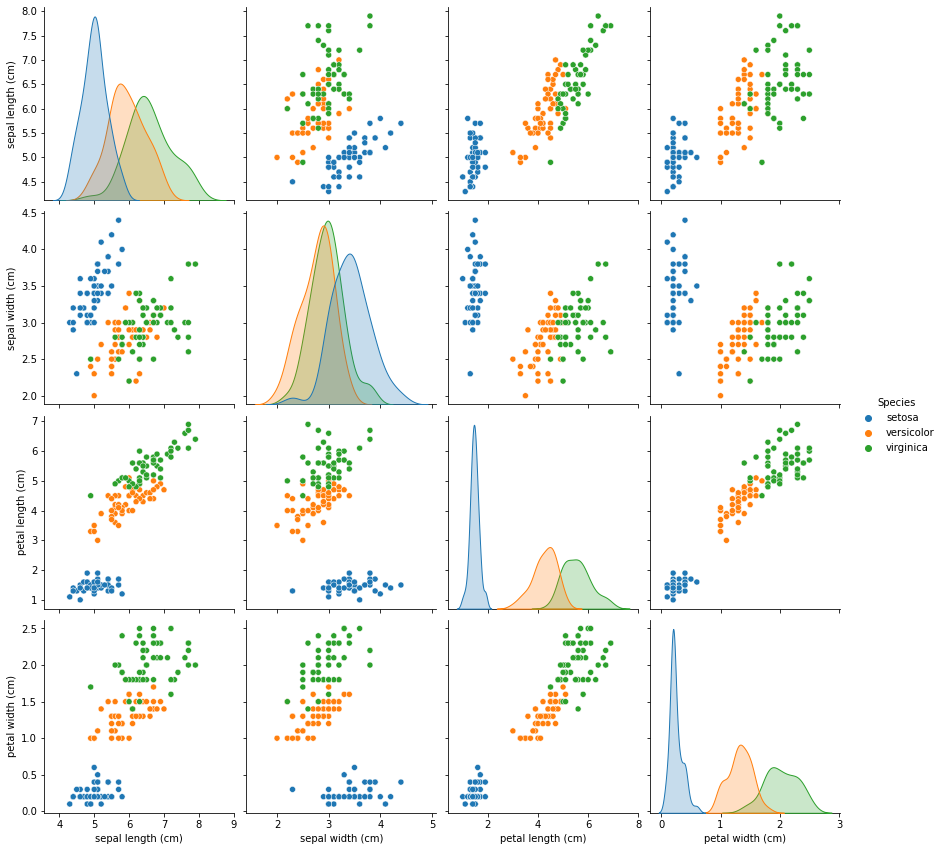

In [11]:
sns.pairplot(iris_data,hue="Species",height=3);

By observing the characteristics of **Setosa**, we can conclude that setosa is easily separable from other species.
### Correlation between variables

<AxesSubplot:>

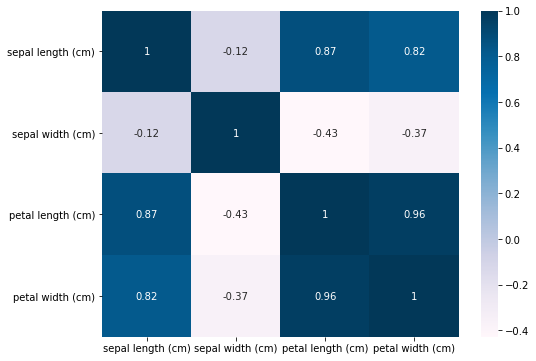

In [12]:
fig = plt.figure(figsize = (8,6))
sns.heatmap(iris_data.corr(), annot=True, cmap="PuBu")

### Let's see the distribution of data for different columns

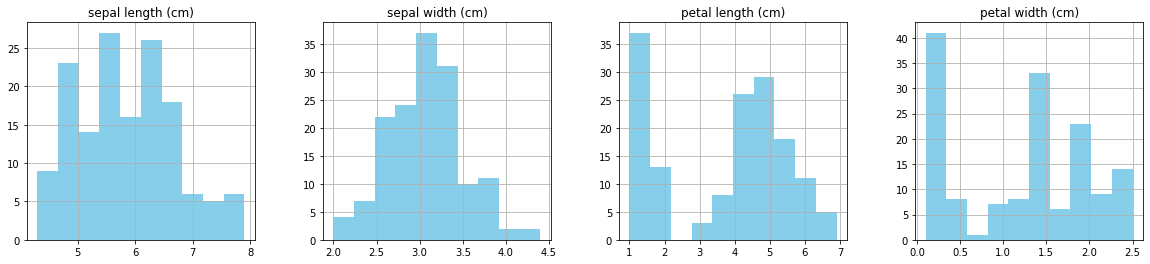

In [13]:
fig, axes = plt.subplots(1,4) 
fig.set_figheight(4)
fig.set_figwidth(20)

for i,col in enumerate(list(iris_data.columns.values)[:-1]):
    a = iris_data.hist(col, ax=axes.flatten()[i], color = "skyblue")

plt.show()

We can observe the distribution of our columns through this histogram which follows a **normal distribution.**

## 3. Locating dependent and independent variables

In [14]:
X = iris_data.iloc[:,:-1]
y = iris_data.iloc[:,-1]

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y[:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

## 4. Splitting the data into train and test set

In [17]:
# splitting the data by giving test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test  :", X_test.shape, " y_test  :", y_test.shape)

X_train : (105, 4) y_train : (105,)
X_test  : (45, 4)  y_test  : (45,)


## 5. Decision Tree Classification

In [19]:
# fitting our Decision tree model on train set
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
# making predictions on test set
y_pred = model.predict(X_test)

In [21]:
# Let's see the difference between actual and predicted values.
prediction = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
prediction.head(10)

,Actual,Predicted
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,versicolor
76,versicolor,versicolor
71,versicolor,versicolor


### Let's visualize our tree

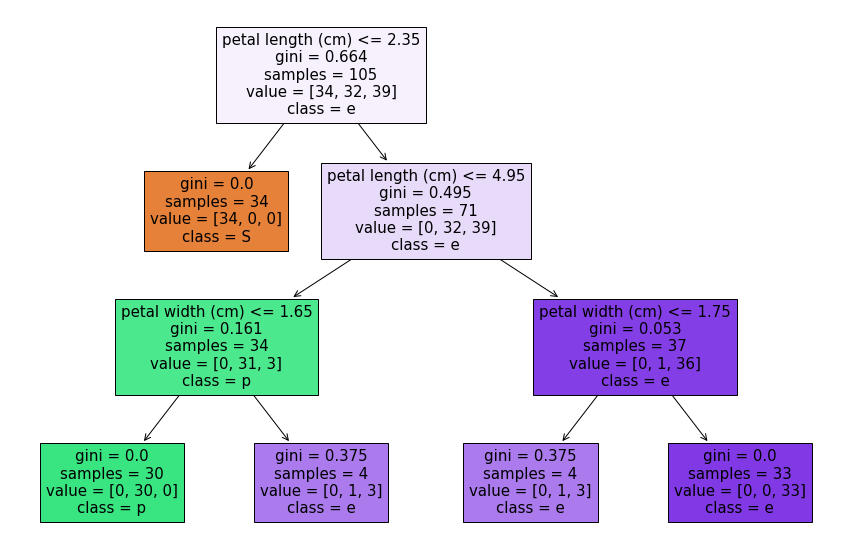

In [22]:
plt.figure(figsize=(15,10))
_ = tree.plot_tree(model,
                   feature_names=iris_data.columns[:-1],
                   class_names=iris_data.columns[-1],
                   filled=True)

## Accuracy

In [23]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

<AxesSubplot:>

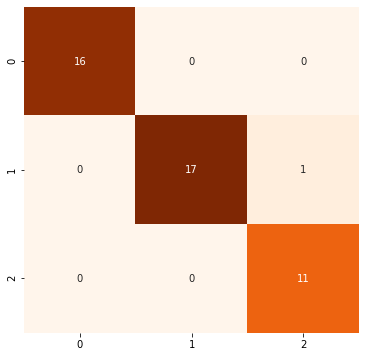

In [24]:
# Let's take a look at confusion matix
conf_matrix = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot=True,cmap="Oranges", cbar=False)

In [25]:
# Trying to get misclassified values after testing.
prediction[y_test!=y_pred]

,Actual,Predicted
83,versicolor,virginica


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Using the model for new data observations

In [27]:
import joblib

# Saving the model as pickle file
file = "Decision_tree_model.pkl"
joblib.dump(model, file)

['Decision_tree_model.pkl']

### Let's use our model to predict the class of new iris observation

In [28]:
# loading saved decision tree model
dt_clf = joblib.load(file)

# model accepts array of features. so we are giving array of features as an input.
X_new = np.array([[5.7, 5.2, 1.3, 2.2]])
iris_pred = dt_clf.predict(X_new)[0]

In [29]:
print("Predicted class of given observation : ", iris_pred)

Predicted class of given observation :  setosa
